# Designing New NanoObject for Colored Lattice

In [1]:
#import mayavi
#https://stackoverflow.com/questions/24752693/python-matplotlib-3d-surface-plot/24784471#24784471

In [1]:
from ScatterSim.NanoObjects import SphereNanoObject,CylinderNanoObject, PolydisperseNanoObject
# We'll import a few lattices, cubic, FCC, BCC and Diamond
from ScatterSim.LatticeObjects import Lattice, SimpleCubic, FCCLattice, BCCLattice, DiamondTwoParticleLattice
# import the peak shape for the peaks, tunable
from ScatterSim.PeakShape import PeakShape
from ScatterSim.CompositeNanoObjects import CompositeNanoObject, OctahedronNanoObject, OctahedronCylindersNanoObject
from ScatterSim.Background import Background

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def show_projections(V_xy, V_xz, V_yz, height, num=4):
    '''plot the xy, xz, and yz projections with height used from 
        projections function, in figure num
    '''
    extent = [-height, height, height, -height]
    plt.figure(num);plt.clf();
    plt.subplot(2,2,1)
    plt.title("x-y plane")
    plt.imshow(V_xy,extent=extent)
    plt.subplot(2,2,2)
    plt.title("y-z plane")
    plt.imshow(V_yz,extent=extent)
    plt.subplot(2,2,3)
    plt.title("x-z plane")
    plt.imshow(V_xz,extent=extent)

In [3]:
pargs_sphere_10 = {'radius':10, 'x0':0}
pargs_sphere_20 = {'radius':20,'x0':0}
pargs_sphere_30 = {'radius':30}

ten = SphereNanoObject(pargs_sphere_10)
twenty = SphereNanoObject(pargs_sphere_20)
thirty = SphereNanoObject(pargs_sphere_30)


sphereobjs = [SphereNanoObject]
# the pargs for each object
sphereparams = [pargs_sphere_10]

ten_twenty = CompositeNanoObject(sphereobjs,sphereparams)

<IPython.core.display.Javascript object>


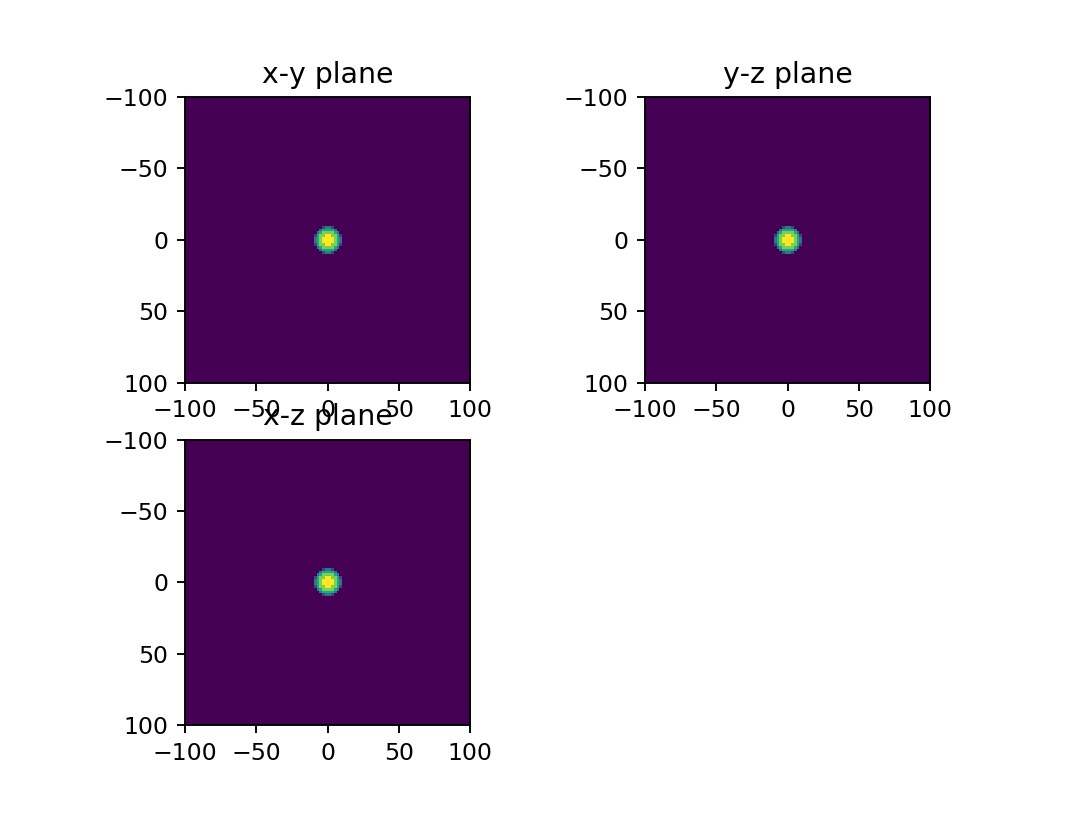

In [4]:
# Shape of your Composite Object
rmax = 100
Vi_xy, Vi_yz, Vi_xz = ten_twenty.projections(rmax)
show_projections(Vi_xy, Vi_yz, Vi_xz ,rmax)

In [9]:
from mayavi.mlab import mesh





In [10]:
def test_mesh():
    """A very pretty picture of spherical harmonics translated from
    the octaviz example."""
    pi = np.pi
    cos = np.cos
    sin = np.sin
    dphi, dtheta = pi / 250.0, pi / 250.0
    [phi, theta] = np.mgrid[0:pi + dphi * 1.5:dphi,
                               0:2 * pi + dtheta * 1.5:dtheta]
    m0 = 4
    m1 = 3
    m2 = 2
    m3 = 3
    m4 = 6
    m5 = 2
    m6 = 6
    m7 = 4
    r = sin(m0 * phi) ** m1 + cos(m2 * phi) ** m3 + \
        sin(m4 * theta) ** m5 + cos(m6 * theta) ** m7
    x = r * sin(phi) * cos(theta)
    y = r * cos(phi)
    z = r * sin(phi) * sin(theta)

    return mesh(x, y, z, colormap="bone")
test_mesh()

ImportError: Could not import backend for traits
_______________________________________________________________________________
Make sure that you have either the TraitsBackendWx or the TraitsBackendQt
projects installed. If you installed Mayavi with easy_install, try
easy_install <pkg_name>. easy_install Mayavi[app] will also work.

If you performed a source checkout, be sure to run 'python setup.py install'
in Traits, TraitsGUI, and the Traits backend of your choice.

Also make sure that either wxPython or PyQT is installed.
wxPython: http://www.wxpython.org/
PyQT: http://www.riverbankcomputing.co.uk/software/pyqt/intro


In [5]:
#Lattice based on composite object in a SC,BCC,FCC lattice

q = np.linspace(.4, 1, 1000)
lattice_spacing = 60 #nm
sigma_D = .06 # add a Debye-Waller factor
peak = PeakShape(delta=0.01, nu=0.01)  
lat_bcc = BCCLattice([ten_twenty], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)
lat_fcc = FCCLattice([ten_twenty], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)
lat_sc = SimpleCubic([ten_twenty], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)

%time Z0_bcc = lat_bcc.intensity(q, peak)
%time Z0_sc =lat_fcc.intensity(q, peak)
%time Z0_fcc = lat_sc.intensity(q, peak)
print('done, phew')

Wall time: 1.48 s
Wall time: 1.51 s
Wall time: 1.23 s
done, phew


<IPython.core.display.Javascript object>


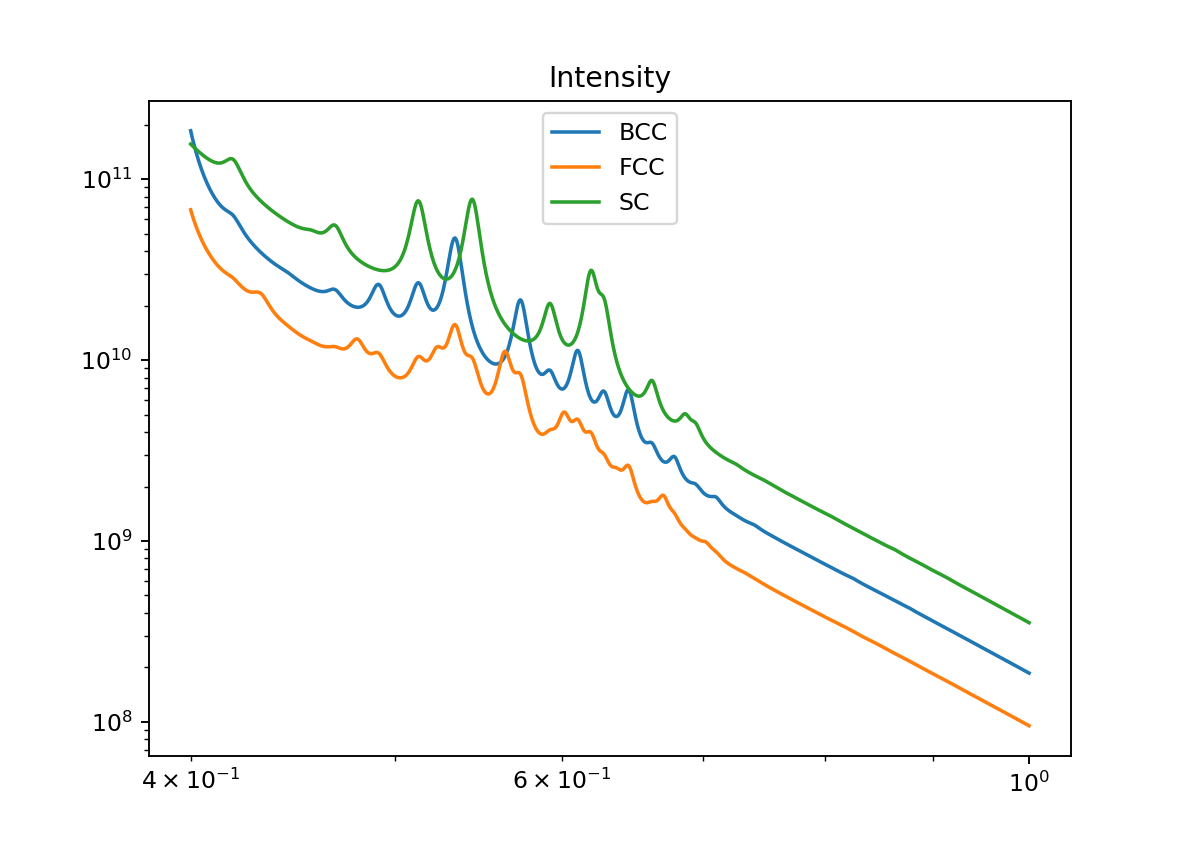

In [6]:
#BCC, FCC and SC
plt.figure(0, figsize=(7,5));
plt.clf()
ROI = [1e9,1e12,0,10]
plt.title("Intensity")
plt.loglog(q, Z0_bcc,label="BCC")
plt.loglog(q,Z0_fcc, label="FCC")
plt.loglog(q,Z0_sc, label="SC")
plt.legend(loc='upper center')


In [7]:
length=100
extent = [-length, length, length, length]
[x_bcc,y_bcc,z_bcc]=lat_bcc.projections(length)
[x_fcc,y_fcc,z_fcc]=lat_fcc.projections(length)
print("Finished Visualization work, lets go plot them")

Finished Visualization work, lets go plot them


In [8]:
np.shape(x_bcc)

(100, 100)

<IPython.core.display.Javascript object>


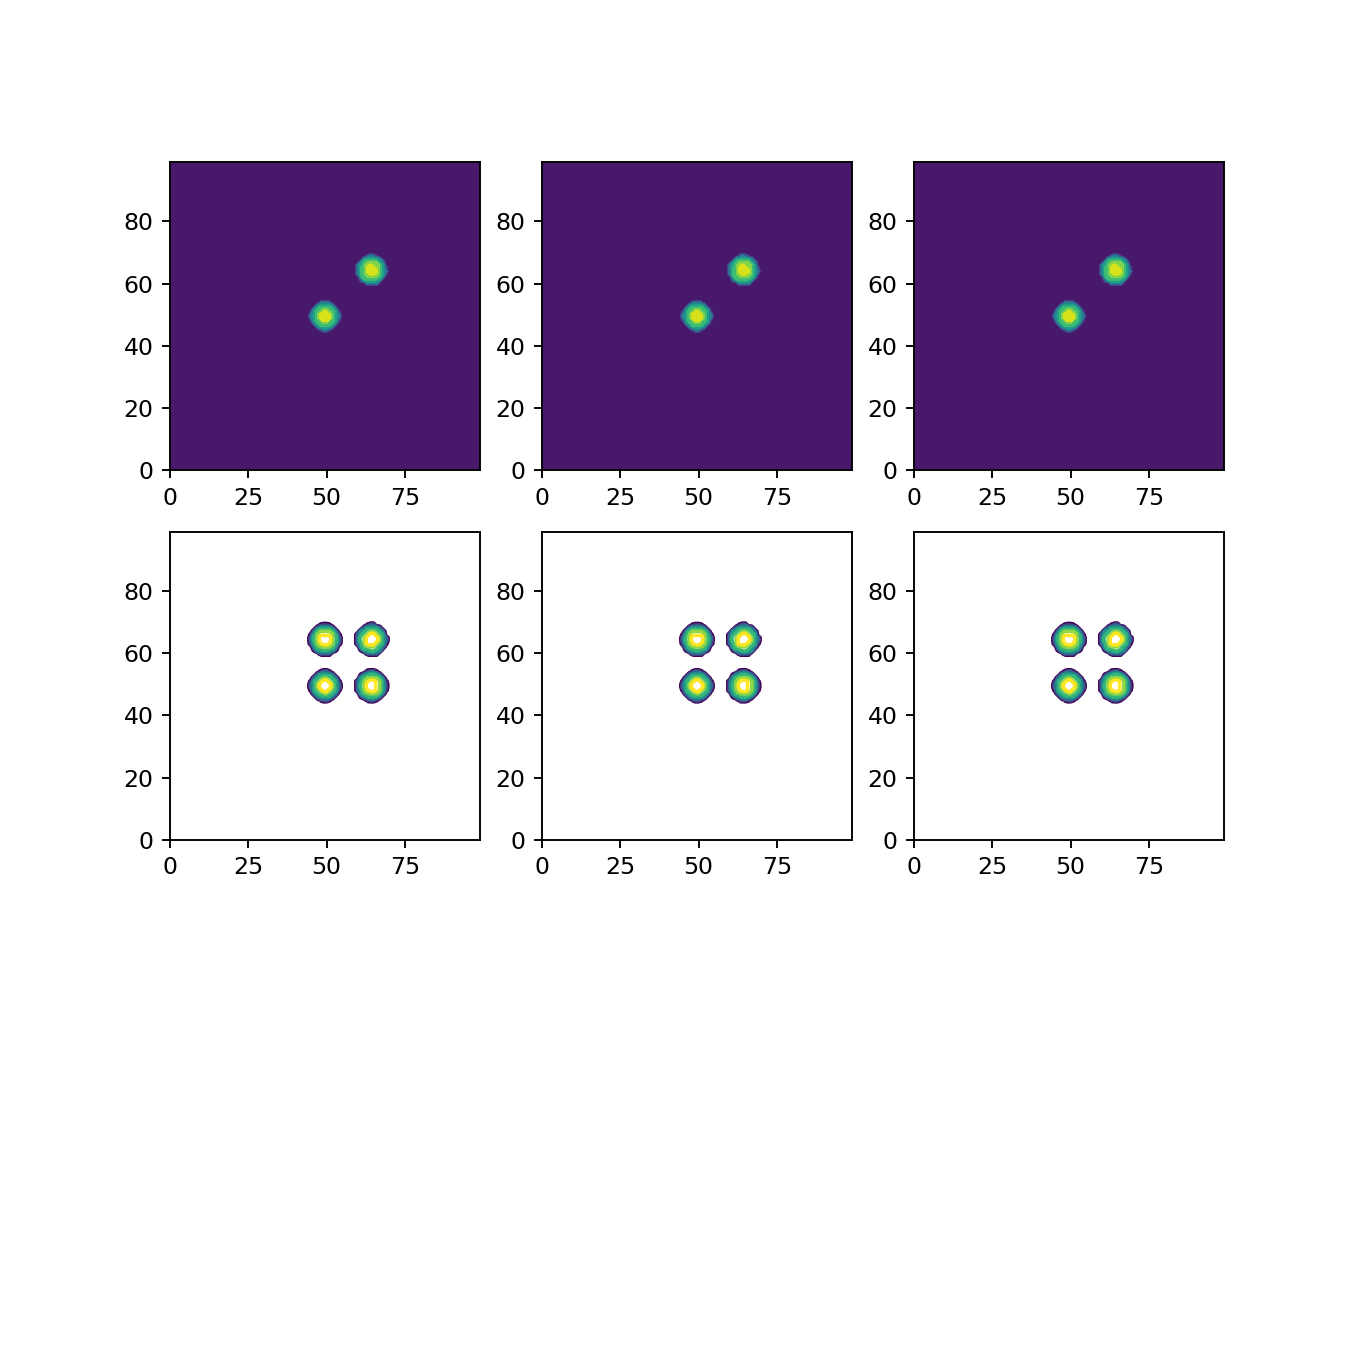

In [9]:
plt.figure('Lattice Visual',figsize=(8,8))
plt.subplot(331)
plt.contourf(x_bcc)
plt.subplot(332)
plt.contourf(y_bcc)
plt.subplot(333)
plt.contourf(z_bcc)
plt.subplot(334)
plt.contour(x_fcc)
plt.subplot(335)
plt.contour(y_fcc)
plt.subplot(336)
plt.contour(z_fcc)

In [10]:
base = CylinderNanoObject
linker = SphereNanoObject
#linker = base
pargs_oct = {'edgelength':10, 'radius':1,'height':10,'linkerlength':1, 'linkerradius':1}

octahedron = OctahedronCylindersNanoObject(base, linker,pargs_oct)

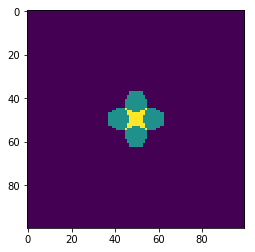

In [11]:
from ipywidgets import widgets 
%matplotlib inline 
length = 10
npoints = 100
x = np.linspace(-length, length, npoints)
# ij indexing means that we index in V[x,y,z]
# Note that rightermost index is fastest varying index
x, y, z = np.meshgrid(x,x,x,indexing='ij')
V = octahedron.V(np.array([x,y,z]))


def f(x):
    i = x
    plt.figure('oct real space');
    plt.clf()
    plt.imshow(V[:,:,i])
    
widgets.interact(f,x=50)



In [18]:


#plt.matshow(V[:,:])

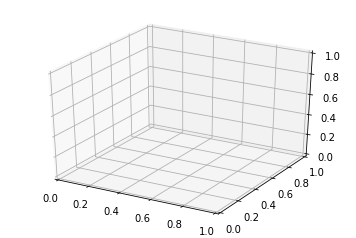

In [19]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt,numpy as np
import pandas as pd
from pandas import DataFrame
plt.clf()
fig = plt.figure(10)
ax = fig.gca(projection='3d')

length = 10
npoints = 100
x = np.linspace(-length, length, npoints)
# ij indexing means that we index in V[x,y,z]
# Note that rightermost index is fastest varying index
x, y, z = np.meshgrid(x,x,x,indexing='ij')
V = octahedron.V(np.array([x,y,z]))

x1 = np.s_[0:100, 0, 0:100]
y1 = np.s_[0,0:100, 0:100]
z1 = np.s_[0:100,0:100,0]



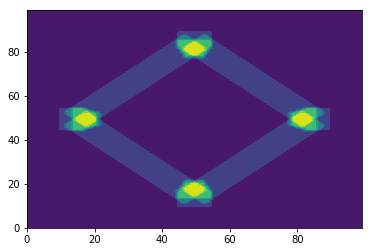

Done!


In [20]:
import numpy as np
#import time
#import matplotlib.pyplot as plt
import scipy.io as c
import pylab as pl                     #added 



length = 10
npoints = 100
x = np.linspace(-length, length, npoints)
# ij indexing means that we index in V[x,y,z]
# Note that rightermost index is fastest varying index
x, y, z = np.meshgrid(x,x,x,indexing='ij')
V = octahedron.V(np.array([x,y,z]))


#datafile = c.loadmat('data.mat') # loading data
img = V # extracting the (100:100:100) array 
imgShape = np.shape(img) 
pl.ion()                               #added 
for i in range(len(V)):           #no need for 0
    pl.cla()                           #added
    pl.contourf(img[:,:,50])
#    time.sleep(0.3) 
    pl.draw()
#    pl.pause(0.3)                      #added   
pl.ioff()                              #added
pl.show()
print('Done!')



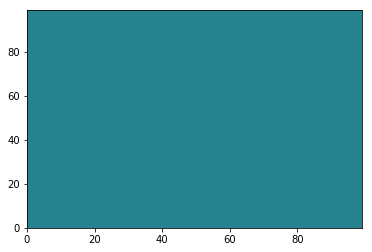

In [21]:

for i in range(len(img)):
    plt.contourf(img[:,:,i])
    plt.draw()
plt.show()

TypeError: contourf() missing 2 required positional arguments: 'Y' and 'Z'

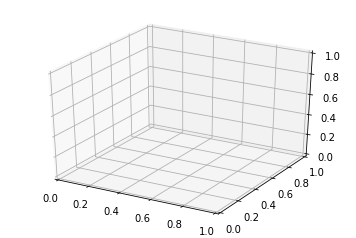

In [22]:
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(len(img)):
    plt.contourf(img[i,:,:],zdir='z')
plt.show()

In [ ]:
range(len(imgShape))

In [ ]:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))




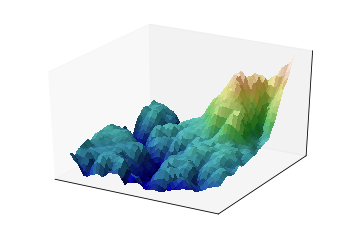

In [23]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

filename = cbook.get_sample_data('jacksboro_fault_dem.npz', asfileobj=False)
with np.load(filename) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
fig.savefig("surface3d_frontpage.png", dpi=25)  # results in 160x120 px image

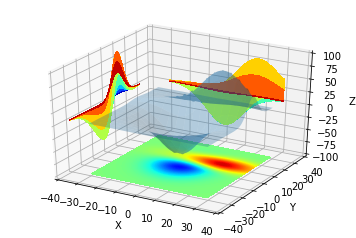

In [24]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt,numpy as np
plt.clf()
fig = plt.figure(1)
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100,
        levels=np.linspace(-100,100,1200),cmap=plt.cm.jet)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=plt.cm.jet)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=plt.cm.jet)
ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)    
plt.show()

In [25]:
q = np.linspace(0.1, 10, 1000)
octahedron_ff = octahedron.form_factor_squared_isotropic(q)



#plt.subplot(2,1,2)
fig1 = plt.figure('')
q = np.linspace(0.1, 10, 1000)
plt.loglog(q,octahedron_ff,color='k', label="octahedron_cylinders")
plt.imshow(Vi_xy)

ValueError: cannot convert float NaN to integer

In [26]:
class OctahedronColoredNanoObject(CompositeNanoObject):
    """An octahedron object made of cylinders or like object. The canonical
        (unrotated) version has the square cross-section in the x-y plane, with
        corners pointing along +z and -z.  The corners are on the x-axis and
        y-axis. The edges are 45 degrees to the x and y axes.
    The canonical (unrotated) version of the cylinders should be aligned along
    the z axis. Replace cylinders with spheres, cylindrical shells, prolate
    ellipsoids etc as you wish.

            It is best to just brute force define all the terms in one shot,
                which I chose to do here.
            notes about rotations:
                - i need to dot the rotation matrix of the octahedron with each
                    individual cylinder's rotationo element
            edgelength : length of edge
            edgespread : how much to expand the rods by (not a good name)
                positive is expansion, negative is compression
            edgesep : separation of element from edge
            rest of pargs are used for the cylinder object
                ex : radius, height
            linkerlength : if specified, adds linkers of specified length,
                centered in between the octahedra
            linkerradius : if linkerlength specified, will add linkers of this radius
            rho_linker : if linkerlength specified, adds linkers of this density
                (defaults to same density as cylinders in octahedra)
            linkerobject : the object to use for the linkers (defaults to baseObject)
    """
    def __init__(self, baseObject=None, linkerObject=None, pargs={}, seed=None):
        if baseObject is None:
            baseObject = CylinderNanoObject
        if linkerObject is None:
            linkerObject = baseObject

        # Set defaults
        if 'edgeshift' not in pargs:
            pargs['edgeshift'] = 0.0
        if 'edgespread' not in pargs:
            pargs['edgespread'] = 0.0
        if 'linkerlength' in pargs:
            addlinkers = True
        else:
            addlinkers = False

        # raise errors for undefined parameters
        if 'edgelength' not in pargs:
            raise ValueError("Need to specify an edgelength for this object")

        # these are slight shifts per cyl along the axis
        # positive is away from COM and negative towards
        shiftlabels = [
            # these correspond to the poslist
            'CYZ1', 'CXZ1', 'CYZ2', 'CXZ2',
            'CXY1', 'CXY4', 'CXY3', 'CXY2',
            'CYZ3', 'CXZ3', 'CYZ4', 'CXZ4',
            'linker1', 'linker2', 'linker3', 'linker4',
            'linker5', 'linker6',
        ]

        # you flip x or y from original shifts to move along edge axis
        # not a good explanation but some sort of personal bookkeeping for now...
        shiftfacs = [
            # top
            [0,-1,1],
            [-1,0,1],
            [0,1,1],
            [1, 0,1],
            # middle
            [-1,1,0],
            [-1,-1,0],
            [1,-1,0],
            [1,1,0],
            # bottom
            [0,1,-1],
            [1, 0, -1],
            [0,-1, -1],
            [-1,0,-1]
        ]

        for lbl1 in shiftlabels:
            if lbl1 not in pargs:
                pargs[lbl1] = 0.

        # calculate shift of COM from edgelength and edgespread
        fac1 = np.sqrt(2)/2.*((.5*pargs['edgelength']) + pargs['edgespread'])
        eL = pargs['edgelength']
        if addlinkers:
            sL = pargs['linkerlength']


        poslist = [
        # eta, theta, phi, x0, y0, z0
        # top part
        [0, 45, -90, 0, fac1, fac1],
        [0, 45, 0, fac1, 0, fac1],
        [0, 45, 90, 0, -fac1, fac1],
        [0, -45, 0, -fac1, 0, fac1],
        # now the flat part
        [0, 90, 45, fac1, fac1, 0],
        [0, 90, -45, fac1, -fac1, 0],
        [0, 90, 45, -fac1, -fac1, 0],
        [0, 90, -45, -fac1, fac1, 0],
        # finally bottom part
        [0, 45, -90, 0, -fac1,-fac1],
        [0, 45, 0, -fac1, 0, -fac1],
        [0, 45, 90, 0, fac1, -fac1],
        [0, -45, 0, fac1, 0, -fac1],
        ]

        if addlinkers:
            poslist_linker = [
                # linkers
                [0, 0, 0, 0, 0, eL/np.sqrt(2) + sL/2.],
                [0, 0, 0, 0, 0, -eL/np.sqrt(2) - sL/2.],
                [0, 90, 0, eL/np.sqrt(2) + sL/2.,0,0],
                [0, 90, 0, -eL/np.sqrt(2) - sL/2.,0,0],
                [0, 90, 90, 0, eL/np.sqrt(2) + sL/2., 0],
                [0, 90, 90, 0, -eL/np.sqrt(2) - sL/2., 0],
            ]
            for row in poslist_linker:
                poslist.append(row)
            shiftfacs_linker = [
                    [0,0,1],
                    [0,0,-1],
                    [1,0,0],
                    [-1,0,0],
                    [0,1,0],
                    [0,-1,0],
            ]
            for row in shiftfacs_linker:
                shiftfacs.append(row)

        poslist = np.array(poslist)
        shiftfacs = np.array(shiftfacs)

        # now add the shift factors
        for i in range(len(poslist)):
            poslist[i, 3:] += np.sqrt(2)/2.*shiftfacs[i]*pargs[shiftlabels[i]]


        # need to create objslist and pargslist
        objlist = list()
        pargslist = list()
        for i, pos  in enumerate(poslist):
            objlist.append(baseObject)

            eta, phi, theta, x0, y0, z0 = pos
            pargstmp = dict()
            pargstmp.update(pargs)
            pargstmp['eta'] = eta
            pargstmp['theta'] = theta
            pargstmp['phi'] = phi
            pargstmp['x0'] = x0
            pargstmp['y0'] = y0
            pargstmp['z0'] = z0

            labeltmp = shiftlabels[i]
            if 'linker' in labeltmp:
                if 'rho_linker' in pargs:
                    pargstmp['rho_object'] = pargs['rho_linker']
                if 'linkerlength' in pargs:
                    pargstmp['height'] = pargs['linkerlength']
                if 'linkerradius' in pargs:
                    pargstmp['radius'] = pargs['linkerradius']

            pargslist.append(pargstmp)

        super(OctahedronCylindersNanoObject, self).__init__(objlist, pargslist, pargs=pargs)


In [12]:

class BCCLatticeColor(Lattice):
    def __init__(self, objects, lattice_spacing_a=1.0, sigma_D=0.01):
        ''' cannot specify lattice_types or lattice_coordinates'''
        # Define the lattice
        symmetry = {
            'crystal family' :  'cubic',
            'crystal system' :  'cubic',
            'Bravais lattice' :  'I',
            'crystal class' :  'hexoctahedral',
            'point group' :  'm3m',
            'space group' :  'Im3m',
        }

        lattice_coordinates = np.array([ (0.0, 0.0, 0.0), \
                                        (0.5, 0.5, 0.5), \
                                    ])
        lattice_types = [1,2]
        positions = ['all']
        lattice_positions = ['corner', 'center']


        super(BCCLatticeColor, self).__init__(objects, lattice_spacing_a=lattice_spacing_a,
                                         sigma_D=sigma_D, symmetry=symmetry,
                                         lattice_positions=lattice_positions,
                                         lattice_coordinates=lattice_coordinates,
                                        lattice_types=lattice_types)

    def symmetry_factor(self, h, k, l):
        """Returns the symmetry factor (0 for forbidden)."""
        return 1
        if (h+k+l)%2==0:
            return 2
        else:
            return 0

    def unit_cell_volume(self):
        return self.lattice_spacing_a**3

    def q_hkl(self, h, k, l):
        """Determines the position in reciprocal space for the given reflection."""

        prefactor = (2*np.pi/self.lattice_spacing_a)
        qhkl_vector = np.array([ prefactor*h, \
                        prefactor*k, \
                        prefactor*l ])
        qhkl = np.sqrt( qhkl_vector[0]**2 + qhkl_vector[1]**2 + qhkl_vector[2]**2 )

        return (qhkl, qhkl_vector)

    def q_hkl_length(self, h, k, l):
        prefactor = (2*np.pi/self.lattice_spacing_a)
        qhkl = prefactor*np.sqrt( h**2 + k**2 + l**2 )

        return qhkl


# BCC Color Lattice

In [13]:
pargs_sphere_10 = {'radius':10, 'x0':0}
pargs_sphere_20 = {'radius':20,'x0':0}

ten = SphereNanoObject(pargs_sphere_10)
twenty = SphereNanoObject(pargs_sphere_20)
thirty = SphereNanoObject(pargs_sphere_30)


sphereobjs = [ten, twenty]
# the pargs for each object


sphereobjs

In [14]:
peak = PeakShape()
peak.lorentzian(delta=0.01)

In [15]:
q = np.linspace(.4, 1, 1000)
lattice_spacing = 60 #nm
sigma_D = .06 # add a Debye-Waller factor



lat_bcc_color = BCCLatticeColor(sphereobjs, lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)
%time Z0_bcc_color = lat_bcc_color.intensity(q, peak)

Wall time: 284 ms


In [16]:
PeakShape.gaussian?

In [17]:
#%debug

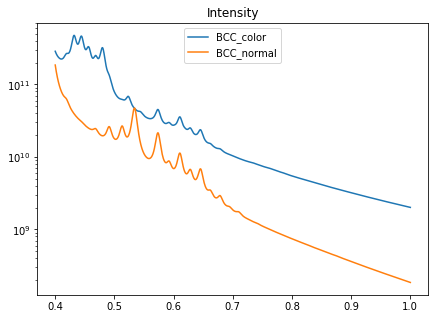

In [18]:
plt.figure(2, figsize=(7,5));
plt.clf()
ROI = [1e9,1e12,0,10]
plt.title("Intensity")
plt.semilogy(q, Z0_bcc_color,label="BCC_color")
plt.semilogy(q,Z0_bcc, label="BCC_normal")
plt.legend(loc='upper center')


In [19]:
length=100
extent = [-length, length, length, length]
[x_bcc_c,y_bcc_c,z_bcc_c]=lat_bcc_color.projections(length)
[x_bcc,y_bcc,z_bcc]=lat_bcc.projections(length)
print("Finished Visualization work, lets go plot them")

Finished Visualization work, lets go plot them


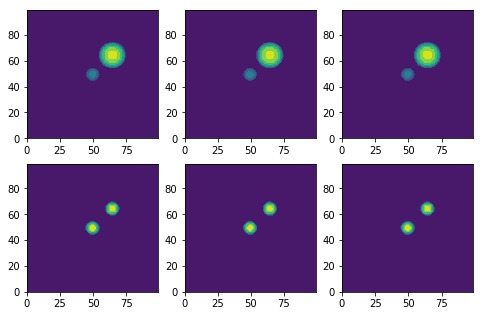

In [20]:
plt.figure('Lattice Visual Color',figsize=(8,8))
plt.subplot(331)
plt.contourf(x_bcc_c)
plt.subplot(332)
plt.contourf(y_bcc_c)
plt.subplot(333)
plt.contourf(z_bcc_c)
plt.subplot(334)
plt.contourf(x_bcc)
plt.subplot(335)
plt.contourf(y_bcc)
plt.subplot(336)
plt.contourf(z_bcc)

# FCC Color Lattice

In [ ]:
from ScatterSim.NanoObjects import SphereNanoObject,CylinderNanoObject, PolydisperseNanoObject
# We'll import a few lattices, cubic, FCC, BCC and Diamond
from ScatterSim.LatticeObjects import Lattice, SimpleCubic, FCCLattice, BCCLattice, DiamondTwoParticleLattice
# import the peak shape for the peaks, tunable
from ScatterSim.PeakShape import PeakShape
from ScatterSim.CompositeNanoObjects import CompositeNanoObject, OctahedronNanoObject, OctahedronCylindersNanoObject
from ScatterSim.Background import Background

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
# the pargs for each object
pargs_sphere_10 = {'radius':10, 'x0':0}
pargs_sphere_20 = {'radius':20,'x0':0}
pargs_sphere_30 = {'radius':30}

ten = SphereNanoObject(pargs_sphere_10)
twenty = SphereNanoObject(pargs_sphere_20)
thirty = SphereNanoObject(pargs_sphere_30)


sphereobjs = [ten, twenty]

sphereobjs
#

In [ ]:
peak = PeakShape()
peak.lorentzian(delta=0.01)

In [ ]:
q = np.linspace(.4, 1, 1000)
lattice_spacing = 60 #nm
sigma_D = .06 # add a Debye-Waller factor



lat_bcc_color = FCCLattice(sphereobjs, lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)
%time Z0_bcc_color = lat_bcc_color.intensity(q, peak)